# ----- START -----

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# =============================================== #

# メモ

In [ ]:
# plt.show() で不要な出力を非表示にできる. 

# =============================================== #

# matplotlib

## plt.plot(x, y)

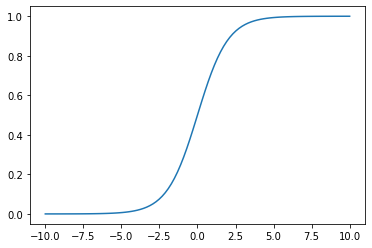

In [ ]:
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
plt.plot(x, y)

,fe1,fe2
0,1,10
1,2,15
2,3,40
3,4,100
4,5,200
5,6,400


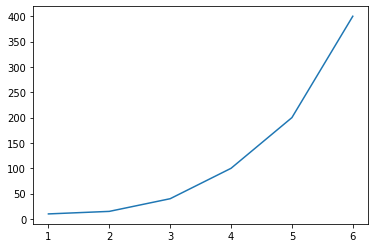

In [ ]:
# DataFrameの場合は次の形式でもOK

df = pd.DataFrame({
    'fe1': [1, 2, 3, 4, 5, 6],
    'fe2': [10, 15, 40, 100, 200, 400]})
display(df)

# plt.plot(df['fe1'], df['fe2'])
plt.plot('fe1', 'fe2', data=df)

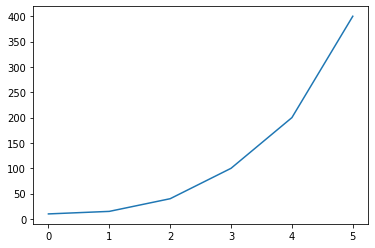

In [ ]:
# xを指定しなかったら, indexがx軸に入る
plt.plot(df['fe2'])

## □ スタイル

### 装飾

In [ ]:
# color : グラフの線の色 ⇨ 'b', 'r', 'g', 'y'
# lw (line width) : 線の太さ ⇨ 数字
# ls (line style) : 線の種類 ⇨ '-', '--' (よく使うのはこの二つ)
# marker : マーカーの種類 ⇨ 'o', 'x'
# markersize : マーカーの大きさ ⇨ 数字
# markerfacecolor : マーカーの色 ⇨ 'b', 'r', 'g', 'y'
# markeredgecolor : マーカーの枠に色 ⇨ 'b', 'r', 'g', 'y'
# markeredgewidth : マーカーの枠の太さ ⇨ 数字
# alpha : plotの透明度 ⇨ 0～1(float) 0に近い程透明度が高い．

### 付属情報

In [ ]:
# plt.xlabel()
# plt.ylabel()
# plt.title()
# plt.plot(label=’ラベル’)でplotにラベルをつけ, plt.legend()で凡例をつける
# plt.xticks()
# plt.yticks()
# plt.axis('off')  軸を消す(画像などで使う)

### color

In [ ]:
# 青	    tab:blue
# オレンジ	tab:orange
# 緑	    tab:green
# 赤	    tab:red
# 紫	    tab:purple
# 茶	    tab:brown
# ピンク	tab:pink
# グレー	tab:gray
# オリーブ	tab:olive
# シアン	tab:cyan

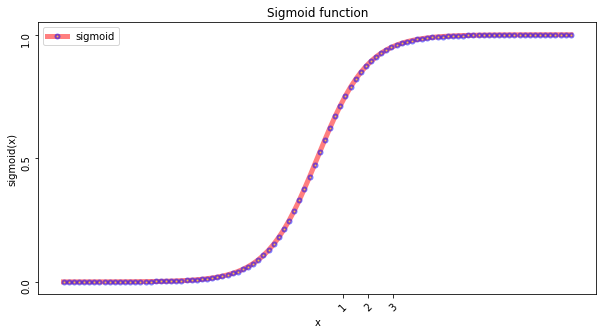

In [ ]:
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))

# dpiは基本指定せず, デフォルトの値を使えばよい
# plt.figure(figsize=(10, 5), dpi=100) # (幅, 高さ)    幅 : 10(inch)*100(dot/inch)=1000dot   高さ : 5(inch)*100(dot/inch)=500dot
plt.figure(figsize=(10, 5))

plt.plot(
    x, y,
    color='red',
    lw=5, ls='-',
    marker='o',
    markersize=2,
    markerfacecolor='yellow',
    markeredgecolor='blue',
    markeredgewidth=4,
    alpha=0.5,
    label='sigmoid'
)

plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid function')
plt.xticks([1, 2, 3], rotation=45)
plt.yticks([0, 0.5, 1], rotation=90)
plt.legend()

plt.savefig('/content/out1.png')

## 1つに複数のグラフ
plt.plot()を追加していけばOK

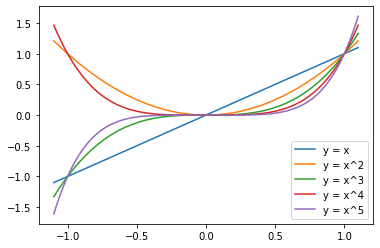

In [ ]:
x = np.linspace(-1.1, 1.1, 100)

plt.plot(x, x, label='y = x')
plt.plot(x, x**2, label='y = x^2')
plt.plot(x, x**3, label='y = x^3')
plt.plot(x, x**4, label='y = x^4')
plt.plot(x, x**5, label='y = x^5')

plt.legend()

## 並列グラフ

### ① : plt.subplot(1, 2, 1), plt.plot(x, x**2)

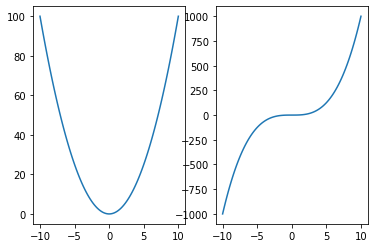

In [ ]:
x = np.linspace(-10, 10, 100)

plt.subplot(1, 2, 1)
plt.plot(x, x**2)

plt.subplot(1, 2, 2)
plt.plot(x, x**3)

### ② : オブジェクト指向型

#### □ スタイル ( axes.set_xx() )

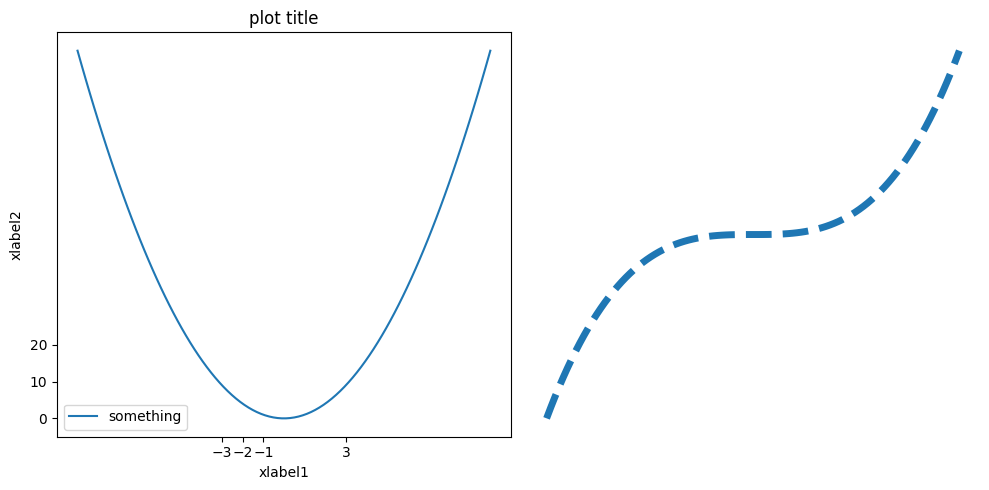

In [ ]:
x = np.linspace(-10, 10, 100)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=100)

axes[0].plot(x, x**2, label='something')
axes[1].plot(x, x**3, lw=5, ls='--',)

axes[0].set_xlabel('xlabel1')
axes[0].set_ylabel('xlabel2')
axes[0].set_title('plot title')
axes[0].set_xticks([-3, -2, -1, 3])
axes[0].set_yticks([0, 10, 20])
axes[0].legend()
axes[1].axis('off')

fig.tight_layout() # 軸のラベル等が被って見にくい場合

fig.savefig('out_sincos.png')

# PDF保存
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('out_sincos.pdf')
pdf.savefig(fig) # figを追加していくイメージ
pdf.close()

#### ②-1 : fig=plt.figure(), ax1=fig.add_subplot(1, 2, 1), ax1.plot(x, x**2)

In [ ]:
fig = plt.figure()
type(fig)

matplotlib.figure.Figure

<Figure size 432x288 with 0 Axes>

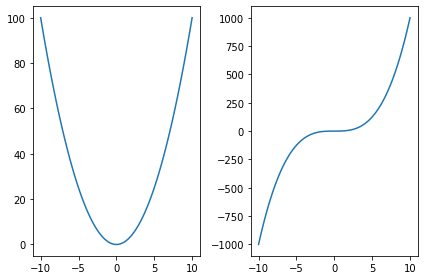

In [ ]:
x = np.linspace(-10, 10, 100)

# figインスタンスを作成し, subplotを足していくイメージ．axesオブジェクトを作っていく.
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x, x**2)
ax2.plot(x, x**3)

fig.tight_layout() # 軸のラベル等が被って見にくい場合

#### ②-2 : fig, axes = plt.subplots(1, 2), axes[0].plot(x, x**2)
推奨

##### 1行列の場合

###### 基本

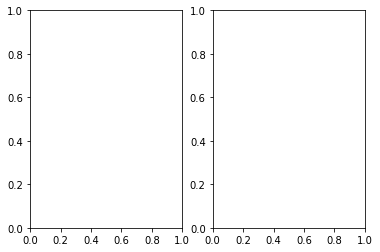

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

In [ ]:
print(axes.shape)
display(axes)

# 1次元のndarray

(2,)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb1b3d9650>,
      dtype=object)

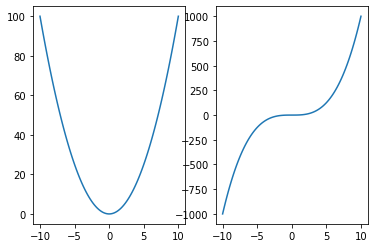

In [ ]:
x = np.linspace(-10, 10, 100)

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(x, x**2)
axes[1].plot(x, x**3)

##### 複数行列の場合

###### 基本

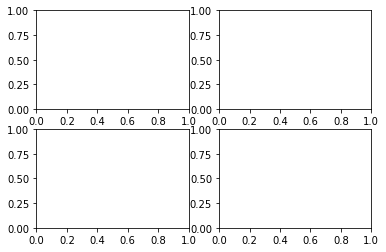

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)

In [ ]:
print(axes.shape)
display(axes)

# 2次元のndarray

(2, 2)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb1b25bc50>,
      dtype=object)

In [ ]:
# ndarrayのindexingは次のような記述をする
axes[0, 0]

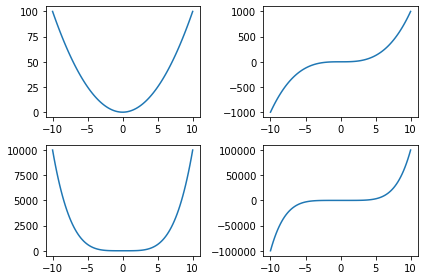

In [ ]:
x = np.linspace(-10, 10, 100)

fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].plot(x, x**2)
axes[0, 1].plot(x, x**3)
axes[1, 0].plot(x, x**4)
axes[1, 1].plot(x, x**5)

fig.tight_layout() # 軸のラベル等が被って見にくい場合

###### ● sin, cos

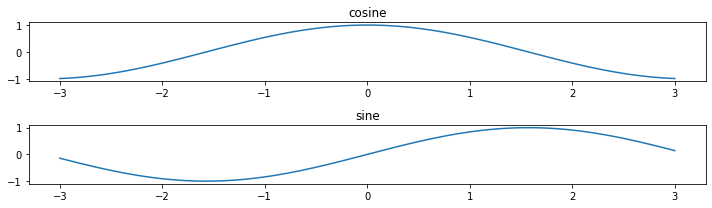

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 3))
x = np.linspace(-3, 3, 100)

axes[0].set_title('cosine')
axes[0].plot(x, np.cos(x))

axes[1].set_title('sine')
axes[1].plot(x, np.sin(x))

fig.tight_layout()

##### 当然1つの場合も使える

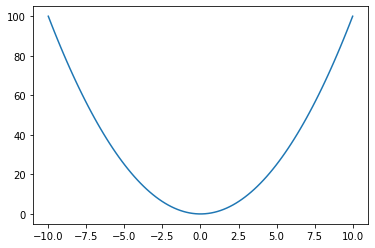

In [ ]:
x = np.linspace(-10, 10, 100)

fig, axes = plt.subplots() #デフォルトはnros=1, ncols=1
axes.plot(x, x**2)

## plt.scatter()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/1-DataScience/myPython/2-graph/Data/tmdb_5000_movies.csv')
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
df['profit'] = df['revenue'] - df['budget']
df = df[['original_title','original_language','revenue','budget','profit','vote_average','vote_count']]
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,original_title,original_language,revenue,budget,profit,vote_average,vote_count
0,Avatar,en,2787965087,237000000,2550965087,7.2,11800
1,Pirates of the Caribbean: At World's End,en,961000000,300000000,661000000,6.9,4500
2,Spectre,en,880674609,245000000,635674609,6.3,4466
3,The Dark Knight Rises,en,1084939099,250000000,834939099,7.6,9106
4,John Carter,en,284139100,260000000,24139100,6.1,2124
...,...,...,...,...,...,...,...
4773,Clerks,en,3151130,27000,3124130,7.4,755
4788,Pink Flamingos,en,6000000,12000,5988000,6.2,110
4792,キュア,ja,99000,20000,79000,7.4,63
4796,Primer,en,424760,7000,417760,6.9,658


Text(0, 0.5, 'budget')

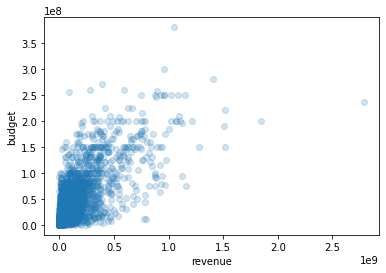

In [ ]:
plt.scatter(df['revenue'], df['budget'], alpha=0.2)
# plt.scatter('revenue', 'budget', data=df, alpha=0.2)

plt.xlabel('revenue')
plt.ylabel('budget')

Text(0, 0.5, 'budget')

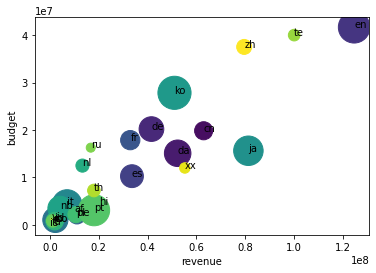

In [ ]:
#マーカーのサイズに意味を持たせることも可能

# gruoupby mean してサンプル数を削減
df_groupby = df.groupby('original_language').mean()[['revenue', 'budget', 'vote_count']]

c = np.arange(len(df_groupby)) # colorに連番を設定
plt.scatter('revenue', 'budget', c=c, s='vote_count', data=df_groupby)

# 各マーカーにtextをいれる
for idx, row in df_groupby.iterrows():
    plt.annotate(idx, (row['revenue'], row['budget']))

plt.xlabel('revenue')
plt.ylabel('budget')

## plt.hist()
- 連続値に対して

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/1-DataScience/myPython/2-graph/Data/tmdb_5000_movies.csv')
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
df['profit'] = df['revenue'] - df['budget']
df = df[['original_title','original_language','revenue','budget','profit','vote_average','vote_count']]
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,original_title,original_language,revenue,budget,profit,vote_average,vote_count
0,Avatar,en,2787965087,237000000,2550965087,7.2,11800
1,Pirates of the Caribbean: At World's End,en,961000000,300000000,661000000,6.9,4500
2,Spectre,en,880674609,245000000,635674609,6.3,4466
3,The Dark Knight Rises,en,1084939099,250000000,834939099,7.6,9106
4,John Carter,en,284139100,260000000,24139100,6.1,2124
...,...,...,...,...,...,...,...
4773,Clerks,en,3151130,27000,3124130,7.4,755
4788,Pink Flamingos,en,6000000,12000,5988000,6.2,110
4792,キュア,ja,99000,20000,79000,7.4,63
4796,Primer,en,424760,7000,417760,6.9,658


Text(0.5, 0, 'vote_average')

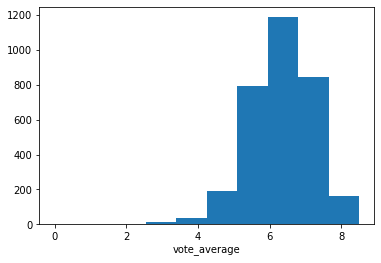

In [ ]:
plt.hist(df['vote_average'], bins=10)
plt.xlabel('vote_average')

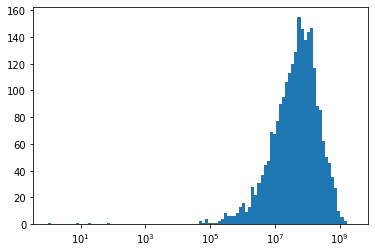

In [ ]:
# x軸をlogスケールにする
logbins = np.logspace(0, np.log10(df['profit'].max()), 100)
plt.hist(df['profit'], bins=logbins)
plt.xscale('log')

## plt.bar()
- カテゴリ値(離散値)に対して

<BarContainer object of 2 artists>

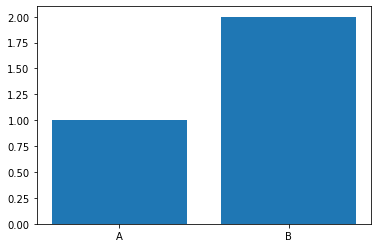

In [ ]:
plt.bar(['A','B'], [1, 2])

,categorical,val
0,A,10
1,B,30
2,C,20


<BarContainer object of 3 artists>

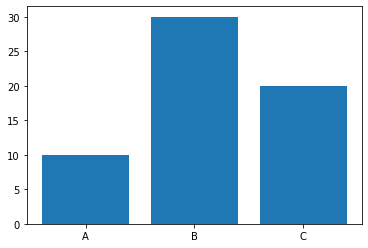

In [ ]:
df = pd.DataFrame({'categorical':['A', 'B', 'C'], 'val':[10, 30, 20]})
display(df)

plt.bar(df['categorical'], df['val'])
# plt.bar('categorical', 'val', data=df)

<BarContainer object of 2 artists>

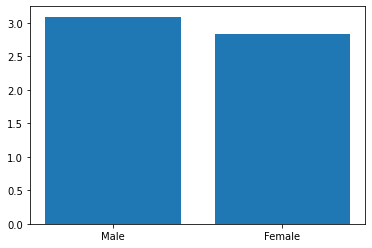

In [ ]:
df = sns.load_dataset("tips")

tip_male_mean = df[df['sex']=='Male']['tip'].mean()
tip_female_mean = df[df['sex']=='Female']['tip'].mean()

plt.bar(['Male','Female'], [tip_male_mean, tip_female_mean])

# sns.barplot() は, 男女別の平均値の算出も含めて実施する. 

## DataFrameのbuilt-in plot

### kind='bar'

,categorical,val
0,A,10
1,B,30
2,C,20


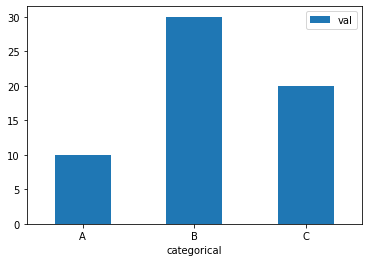

In [ ]:
df = pd.DataFrame({'categorical':['A', 'B', 'C'], 'val':[10, 30, 20]})
display(df)

df.plot('categorical', 'val', kind='bar', rot=0)

## plt.boxplot()

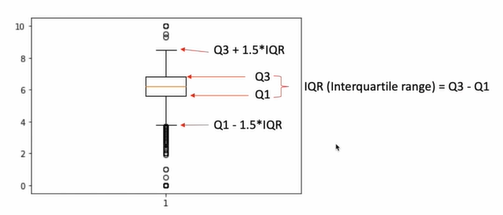

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb17231510>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb179f39d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb17231b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb1802ed10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb17fe30d0>],
 'means': []}

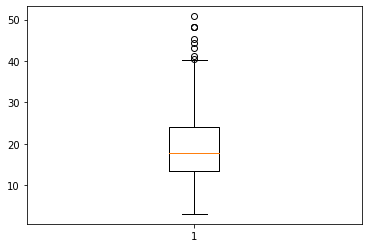

In [ ]:
df = sns.load_dataset("tips")

plt.boxplot(df['total_bill'])
# plt.boxplot('total_bill', data=df)

## plt.annotate('Hello', (1, 1))

Text(0.5, 0.5, 'Hello')

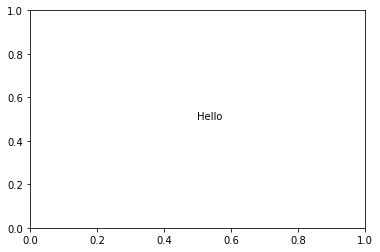

In [ ]:
plt.annotate('Hello', (0.5, 0.5))

# =============================================== #

# seaborn
- matplotlibのラッパーライブラリで, より洗練されたデザイン

## □ スタイル
- sns.function()の戻り値は matplotlibのaxes → matplotlibのSTYLEが使用可能
- 直接pltで装飾することも可能

### sns.set()

#### context引数 : 文字の大きさ
-  context引数 : 'paper', 'notebook', 'talk', 'poster’

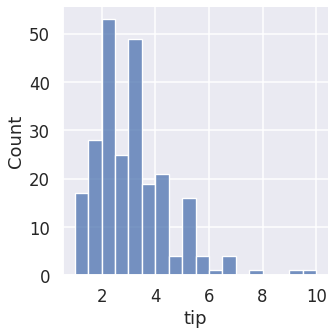

In [ ]:
df = sns.load_dataset('tips')

sns.set(context='talk')
# sns.set_context('poster') # これでもOK

sns.displot(df['tip'])

#### style引数
- style引数： 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

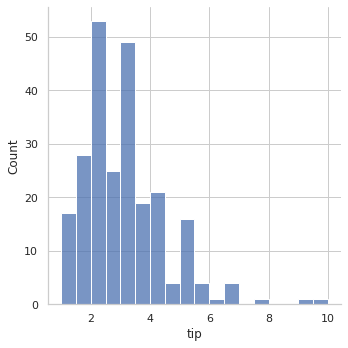

In [ ]:
df = sns.load_dataset('tips')

sns.set(context='notebook', style='whitegrid')
# sns.set_style('whitegrid') # これでもOK

sns.displot(df['tip'])

#### palette引数 : 色合い
- seabornのpalette : 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind'
- https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html

##### hue= がある場合
sns.set() に palette= を指定すればよい

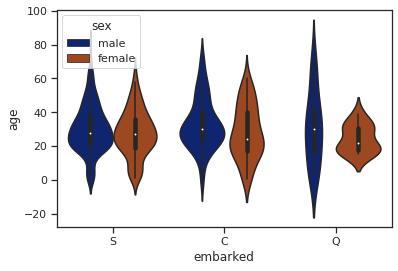

In [ ]:
df = sns.load_dataset("titanic")

sns.set(context='notebook', style='ticks', palette='dark')

sns.violinplot(x='embarked', y='age', data=df, hue='sex')

##### hue= がない場合
sns.violinplot() の中に palette= を指定するようだが, 何故かhue= がある場合と同様に sns.set() に palette= を指定することでできた

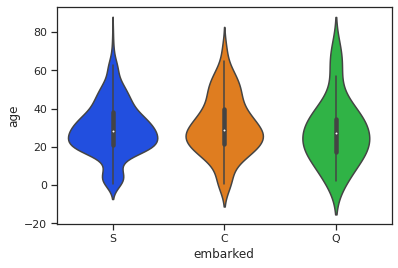

In [ ]:
df = sns.load_dataset("titanic")

sns.set(context='notebook', style='ticks', palette='bright')
# sns.set(context='notebook', style='ticks')

sns.violinplot(x='embarked', y='age', data=df)
# sns.violinplot(x='embarked', y='age', data=df, palette='bright')

### matplotlibの付属情報

#### ① plt.
seabornの中でmatplotlibが呼ばれているので, plt.で付属情報を追加できる.

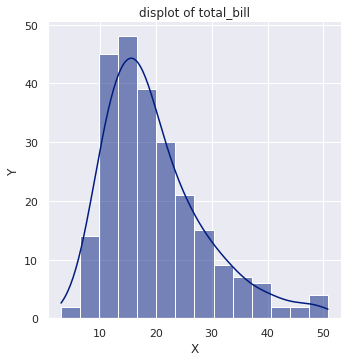

In [ ]:
df = sns.load_dataset("tips")

sns.set(context='notebook', style='darkgrid', palette='dark')

sns.displot(df['total_bill'], kde=True)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('displot of total_bill')
plt.savefig('out_style.png')

#### ② オブジェクト指向型 

Text(0.5, 1.0, 'tip')

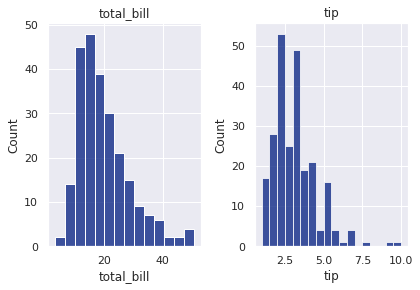

In [ ]:
df = sns.load_dataset("tips")

sns.set(context='notebook', style='darkgrid', palette='dark')


fig, axes = plt.subplots(1, 2)

sns.histplot(df['total_bill'], ax=axes[0]) 
sns.histplot(df['tip'], ax=axes[1])

fig.tight_layout()

axes[0].set_title('total_bill')
axes[1].set_title('tip')


# matplotlibでは, axes[0].plot() だったが, 
# seabornでは, sns.distplot(ax=axes[0]) のように指定する. 

## Numerical Plot

### sns.lineplot()

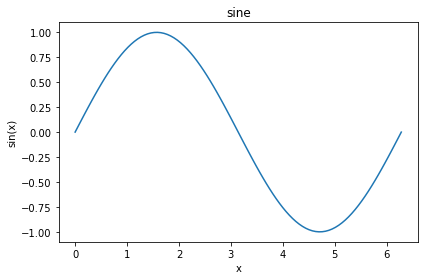

In [ ]:
x  = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

fig, axes = plt.subplots()
axes.plot(x, y)
axes.set_xlabel('x')
axes.set_ylabel('sin(x)')
axes.set_title('sine')
fig.tight_layout()

### sns.displot()
- dis't'plotがアップデートしたのがdisplot

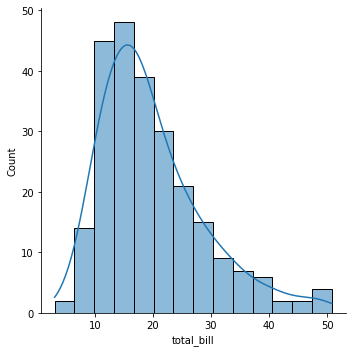

In [ ]:
df = sns.load_dataset("tips")

sns.displot(df['total_bill'], kde=True)

### sns.jointplot()

In [ ]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


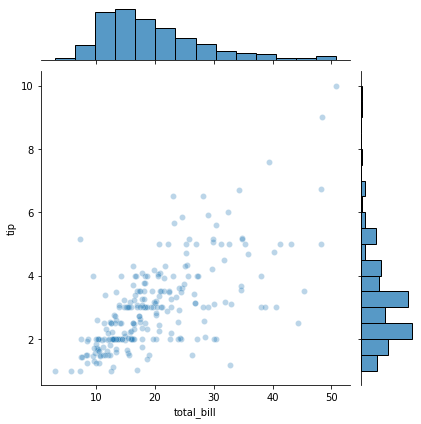

In [ ]:
# 散布図

# sns.jointplot(x='total_bill', y='tip', data=df, alpha=0.3)
sns.jointplot(
    x=df['total_bill'],
    y=df['tip'],
    alpha=0.3,
)

In [ ]:
dict(alpha=0.3, beta=0.2)

{'alpha': 0.3, 'beta': 0.2}

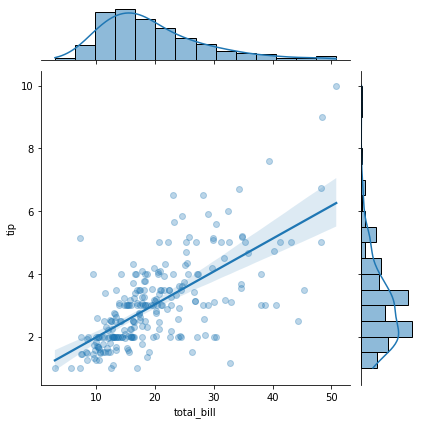

In [ ]:
# 散布図 + 回帰直線

sns.jointplot(
    x=df['total_bill'],
    y=df['tip'],
    kind='reg',
    joint_kws = {'scatter_kws': dict(alpha=0.3)}
)

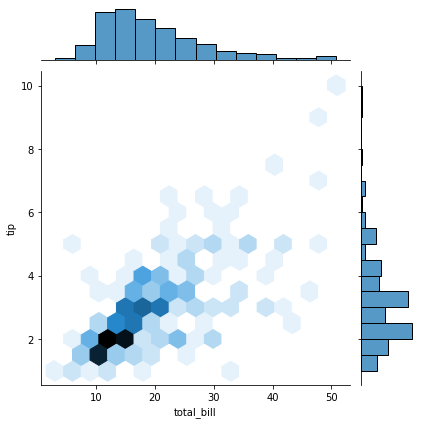

In [ ]:
sns.jointplot(
    x=df['total_bill'],
    y=df['tip'],
    kind='hex',
)

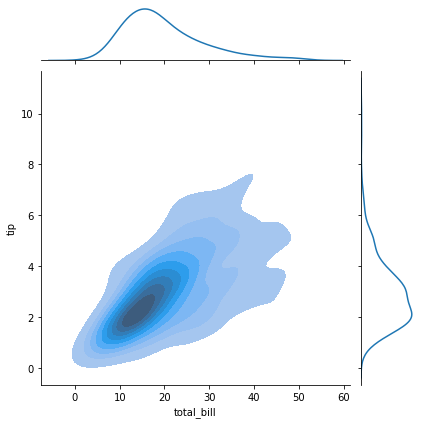

In [ ]:
sns.jointplot(
    x=df['total_bill'],
    y=df['tip'],
    kind='kde',
    shade=True,
)

### sns.pairplot()

In [ ]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


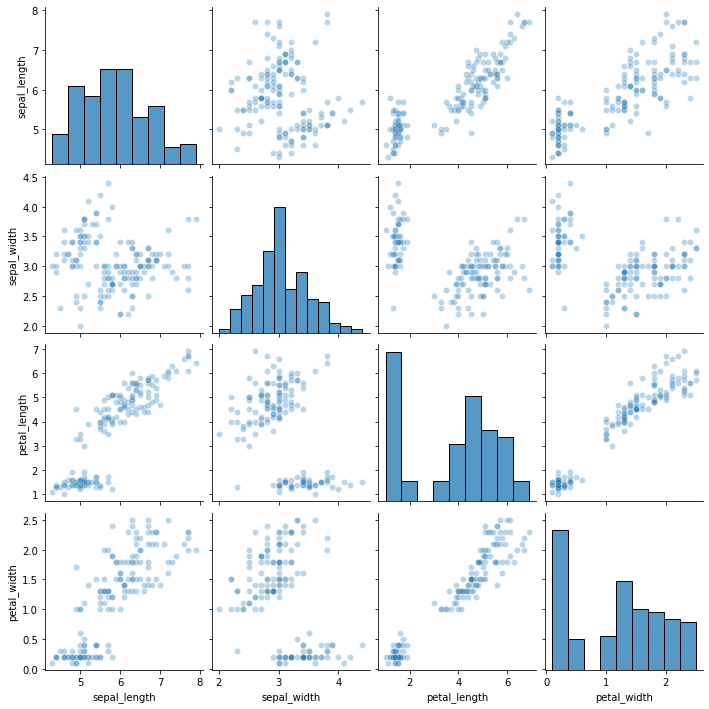

In [ ]:
sns.pairplot(
    df, 
    plot_kws={'alpha':0.3},
    diag_kind='hist', # 'hist''kde'
)

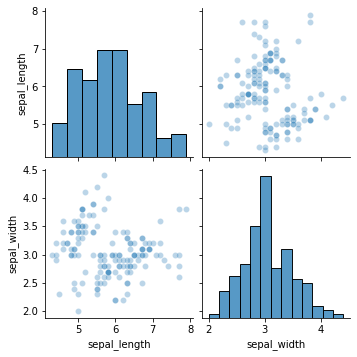

In [ ]:
# 特徴量を選択して
sns.pairplot(
    df[['sepal_length','sepal_width']], 
    plot_kws={'alpha':0.3},
    diag_kind='hist', # 'hist''kde'
)

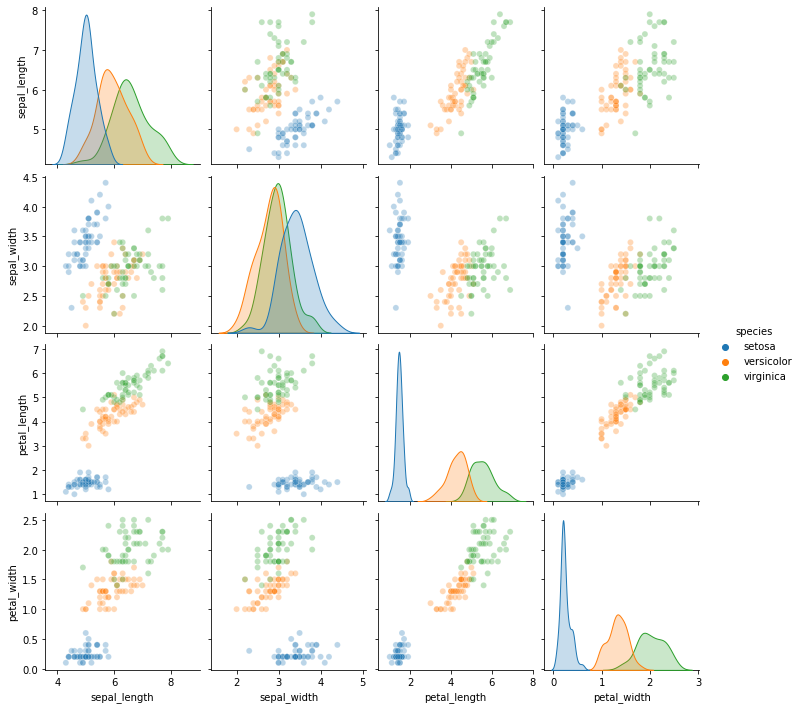

In [ ]:
# hue= を指定して

sns.pairplot(
    df,
    hue='species',
    plot_kws={'alpha':0.3},
    diag_kind='kde', # 'hist''kde'
)

### sns.heatmap()
- データサイエンスでは相関表や混同行列によく使われる. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/1-DataScience/myPython/2-graph/Data/tmdb_5000_movies.csv')
df = df[['original_title','original_language','revenue','budget','vote_average','vote_count']]
df = df[(df!=0).all(axis=1)]
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,original_title,original_language,revenue,budget,vote_average,vote_count
0,Avatar,en,2787965087,237000000,7.2,11800
1,Pirates of the Caribbean: At World's End,en,961000000,300000000,6.9,4500
2,Spectre,en,880674609,245000000,6.3,4466
3,The Dark Knight Rises,en,1084939099,250000000,7.6,9106
4,John Carter,en,284139100,260000000,6.1,2124
...,...,...,...,...,...,...
4773,Clerks,en,3151130,27000,7.4,755
4788,Pink Flamingos,en,6000000,12000,6.2,110
4792,キュア,ja,99000,20000,7.4,63
4796,Primer,en,424760,7000,6.9,658


In [ ]:
# 相関行列
corr = df.corr()
corr

,revenue,budget,vote_average,vote_count
revenue,1.000000,0.705306,0.188014,0.756143
budget,0.705306,1.000000,-0.035757,0.539997
vote_average,0.188014,-0.035757,1.000000,0.380825
vote_count,0.756143,0.539997,0.380825,1.000000


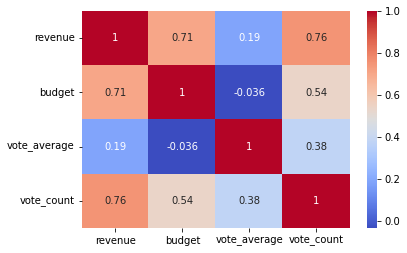

In [ ]:
sns.heatmap(corr, cmap='coolwarm', annot=True)

## Categorical Plot

### sns.barplot()

- sns.barplot()はplt.bar()と違って, 平均値などの値自体を指定して比較するではなく, 平均値などの計算プロセスも含まれる. 

In [ ]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


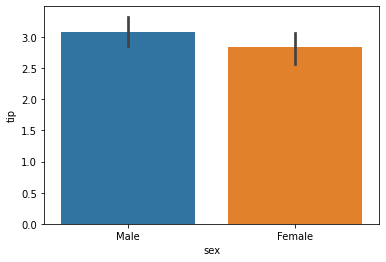

In [ ]:
# 男女別の'tip'の平均値を計算するところまでやってくれるのがsns.barplot()

sns.barplot(
    x=df['sex'],
    y=df['tip'],
    estimator=np.mean,
    ci=95, # None
)

# sns.barplot(
#     x='sex',
#     y='tip',
#     data=df,
#     estimator=np.mean,
#     ci=95, # None
# )

<BarContainer object of 2 artists>

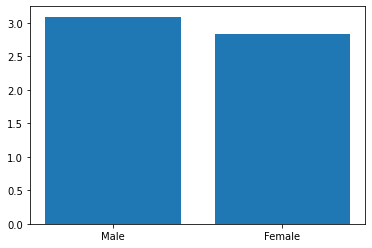

In [ ]:
# plt.bar()で同じことをやるには, まず男女別の'tip'の平均値を算出する必要がある. 

tip_male_mean = df[df['sex']=='Male']['tip'].mean()
tip_female_mean = df[df['sex']=='Female']['tip'].mean()

plt.bar(['Male','Female'], [tip_male_mean, tip_female_mean])

### sns.countplot()

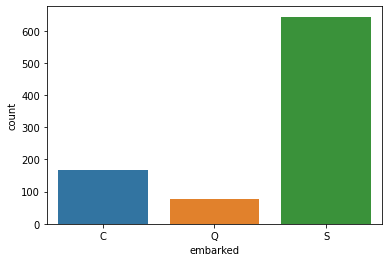

In [ ]:
df = sns.load_dataset("titanic")

# sns.countplot(x=df['embarked'])
# sns.countplot(x='embarked', data=df)
sns.countplot(x='embarked', data=df.sort_values('embarked')) # sortすることで, カテゴリの順番を指定可能

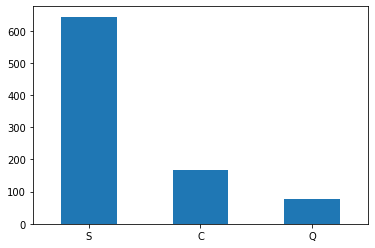

In [ ]:
# 次のようにも書ける

df = sns.load_dataset( "titanic")

df['embarked'].value_counts().plot(kind='bar', rot=0)
plt.show()

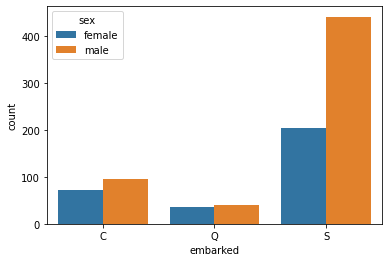

In [ ]:
# hue= を指定

# sns.countplot(x=df['embarked'], hue=df['sex'])
# sns.countplot(x='embarked', data=df, hue='sex')
sns.countplot(x='embarked', data=df.sort_values('embarked'), hue='sex') # sortすることで, カテゴリの順番を指定可能

### sns.boxplot()
- 箱ひげ図
- データの密集度は分からない

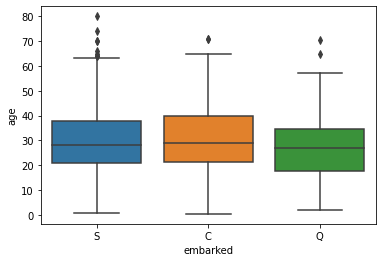

In [ ]:
df = sns.load_dataset("titanic")

# sns.boxplot(x=df['embarked'], y=df['age'])
sns.boxplot(x='embarked', y='age', data=df)

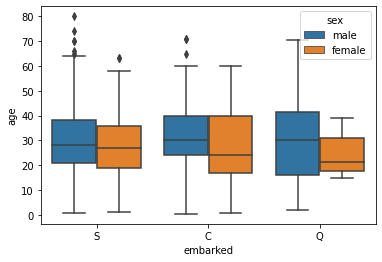

In [ ]:
sns.boxplot(x='embarked', y='age', data=df, hue='sex')

### sns.violinplot()
- データの分布や密集度は分かるが, データ量(多いか少ないか)は分からない. 

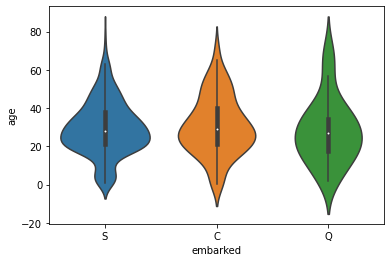

In [ ]:
df = sns.load_dataset("titanic")

sns.violinplot(x=df['embarked'], y=df['age'])
# sns.violinplot(x='embarked', y='age', data=df)

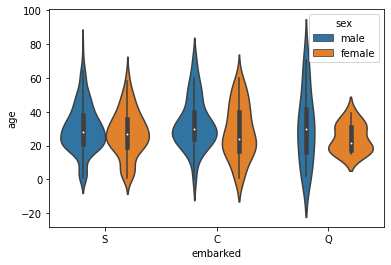

In [ ]:
sns.violinplot(x='embarked', y='age', data=df, hue='sex')

### sns.swarmplot()
- データ量が分かる

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


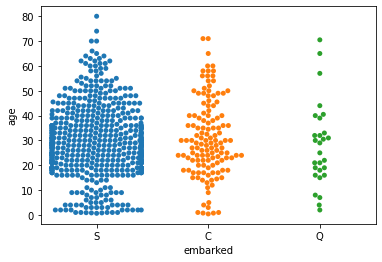

In [ ]:
df = sns.load_dataset("titanic")

sns.swarmplot(x=df['embarked'], y=df['age'])
# sns.swarmplot(x='embarked', y='age', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


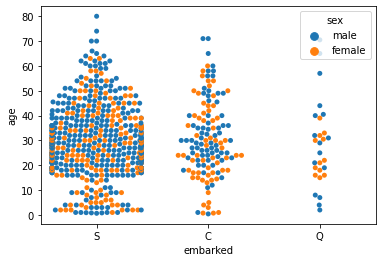

In [ ]:
sns.swarmplot(x='embarked', y='age', data=df, hue='sex')

## 並列グラフ

Text(0.5, 1.0, 'tip')

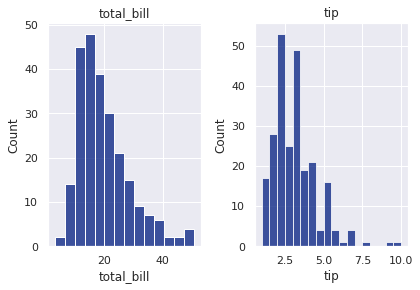

In [ ]:
df = sns.load_dataset("tips")

sns.set(context='notebook', style='darkgrid', palette='dark')


fig, axes = plt.subplots(1, 2)

sns.histplot(df['total_bill'], ax=axes[0]) 
sns.histplot(df['tip'], ax=axes[1])

fig.tight_layout()

axes[0].set_title('total_bill')
axes[1].set_title('tip')


# matplotlibでは, axes[0].plot() だったが, 
# seabornでは, sns.distplot(ax=axes[0]) のように指定する. 

# =============================================== #

# その他

## PDFに保存
- pngだと分かれて保存されるが、PDFだとまとめて保存されるので便利
- 生成されるPDFは[Ctrl+F]での検索にも対応してるので便利

### fig指定

#### myBest

11501568/11490434 [==============================] - 0s 0us/step


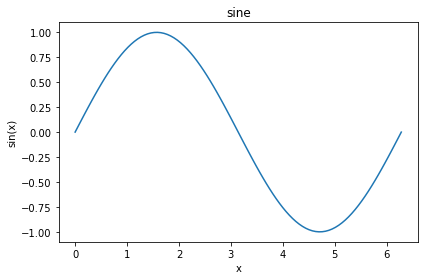

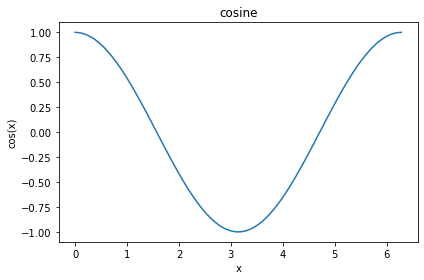

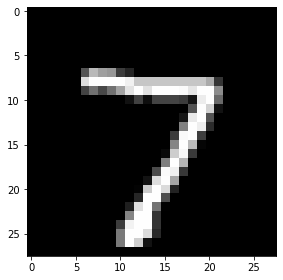

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

x  = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

pdf = PdfPages('out-No01.pdf')

# ------------------------------ #
fig, axes = plt.subplots()
axes.plot(x, y1)
axes.set_xlabel('x')
axes.set_ylabel('sin(x)')
axes.set_title('sine')
fig.tight_layout()
pdf.savefig(fig)
# ------------------------------ #

# ------------------------------ #
fig, axes = plt.subplots()
# axes.plot(x, y2)
sns.lineplot(x=x, y=y2, ax=axes)
axes.set_xlabel('x')
axes.set_ylabel('cos(x)')
axes.set_title('cosine')
fig.tight_layout()
pdf.savefig(fig)
# ------------------------------ #

# ------------------------------ #
from tensorflow.keras.datasets import mnist
(_, _),(X_test, _i2) = mnist.load_data()
img_g = X_test[0]

fig, axes = plt.subplots()
axes.imshow(img_g, cmap="gray")
fig.tight_layout()
pdf.savefig(fig)
# ------------------------------ #

pdf.close()

#### その他の例

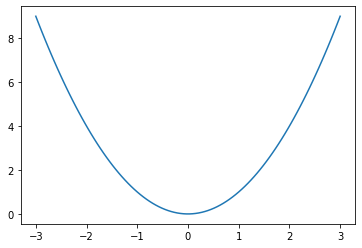

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('out_func.pdf') # pdfインスタンス作成

# ------------
x = np.linspace(-3, 3, 100)

fig, axes = plt.subplots()
axes.plot(x, x**2)
# ------------

pdf.savefig(fig) # figを追加していくイメージ
pdf.close() # close処理

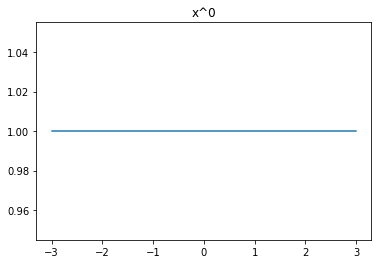

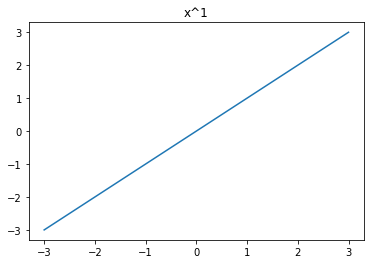

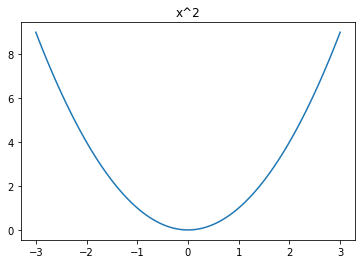

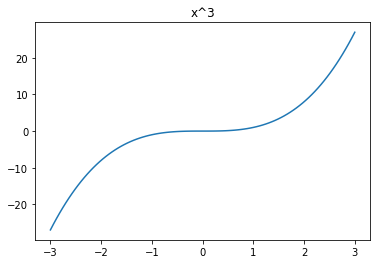

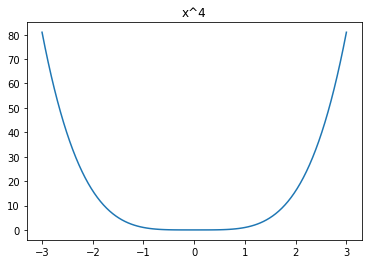

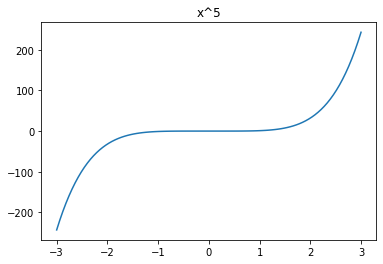

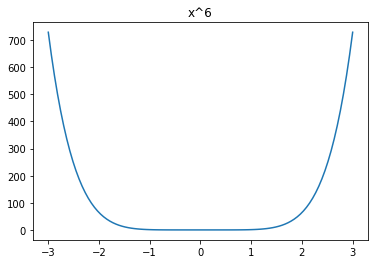

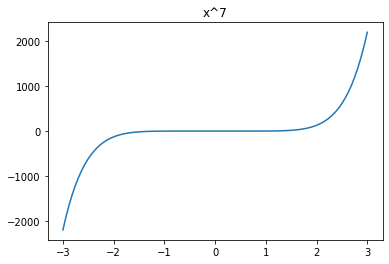

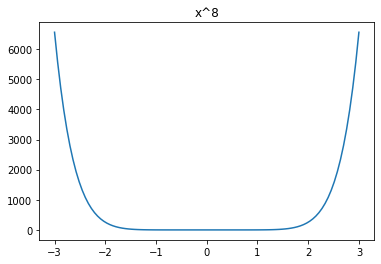

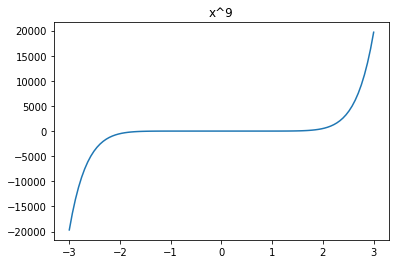

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('out_func_2.pdf') # pdfインスタンス作成


for i in range(0, 10):
    #------グラフ作成--------
    fig, axes = plt.subplots()
    axes.plot(x, x**i)
    axes.set_title(f'x^{i}')
    #-----------------------
 
    #forループのなかで保存
    pdf.savefig(fig)


pdf.close() # close処理

### fig指定なし
https://qiita.com/ceptree/items/c7b18fdf938ec1b5021e

#### 個別に保存

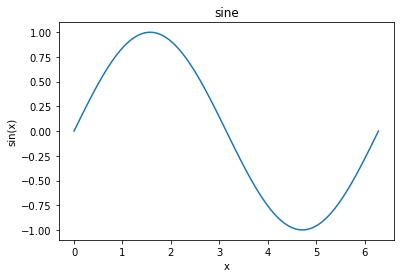

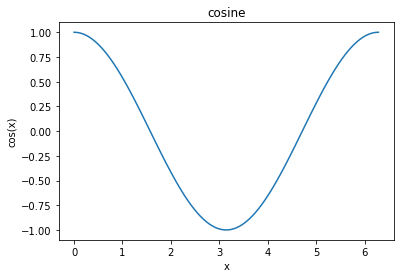

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

x  = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

pdf = PdfPages('out-No01.pdf')

plt.figure()
plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('sine')
pdf.savefig()

plt.figure()
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.title('cosine')
pdf.savefig()

pdf.close()

#### 開いているfigureを一括保存

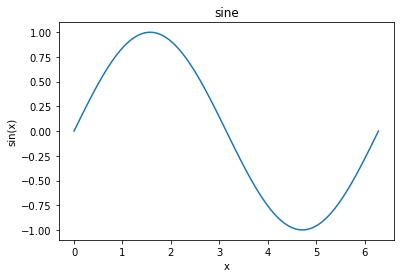

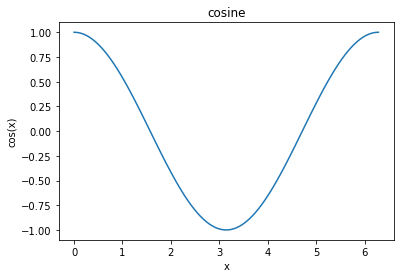

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

x  = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure()
plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('sine')

plt.figure()
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.title('cosine')

pdf = PdfPages('test2.pdf')

fignums = plt.get_fignums()
for fignum in fignums:
    plt.figure(fignum)
    pdf.savefig()

pdf.close()

# =============================================== #

# 例

## ● 複数系列棒グラフ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_org = pd.read_csv('/content/drive/MyDrive/myPython/2-graph/Data/torque_extrusion.csv')
df_org

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Case,pred,gt
0,Case1,64400.0,64470
1,Case2,64435.0,64830
2,Case3,64830.0,65310
3,Case4,65310.0,65990
4,Case5,64580.0,64630
...,...,...,...
31,Case2-11,41100.0,41300
32,Case2-12,41100.0,42100
33,Case2-13,47300.0,49100
34,Case2-14,49100.0,47300


In [ ]:
# 識別idを定義して，縦結合

df_1 = df_org[['Case','pred']]
df_2 = df_org[['Case','gt']]

df_1['id'] = ['pred' for _ in range(len(df_1))]
df_2['id'] = ['gt' for _ in range(len(df_2))]

df_1.columns = df_2.columns =  ['Case', 'value', 'id']

df_concat = pd.concat([df_1, df_2],sort=False).reset_index(drop=True)
df_concat

,Case,value,id
0,Case1,64400.0,pred
1,Case2,64435.0,pred
2,Case3,64830.0,pred
3,Case4,65310.0,pred
4,Case5,64580.0,pred
...,...,...,...
67,Case2-11,41300.0,gt
68,Case2-12,42100.0,gt
69,Case2-13,49100.0,gt
70,Case2-14,47300.0,gt


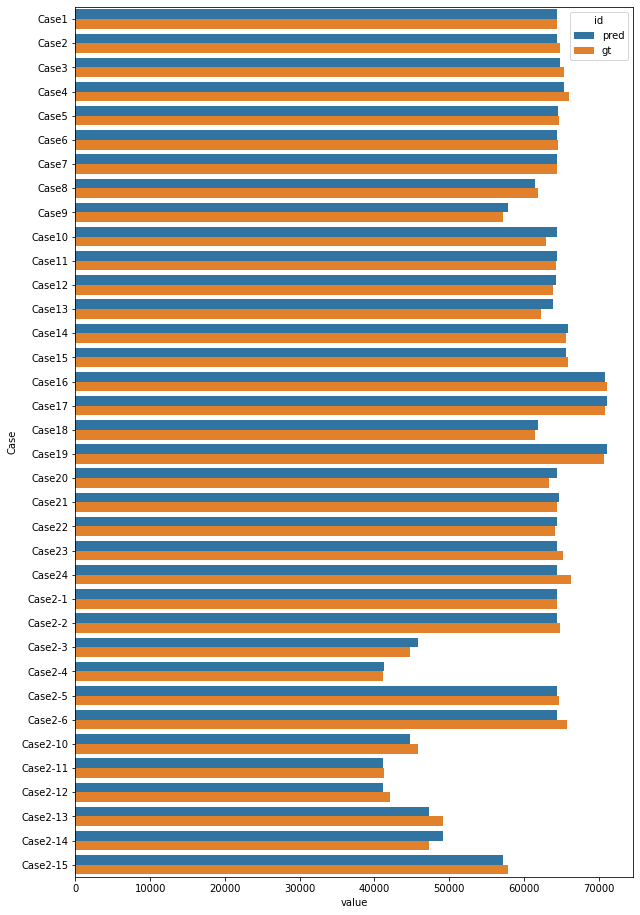

In [ ]:
plt.figure(figsize=(10,16))
sns.barplot(x='value', y='Case', hue='id', data=df_concat)

## ● 3次元グラフ : 損失関数の可視化

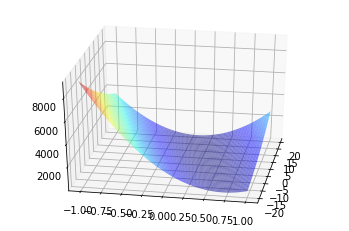

In [ ]:
from io import StringIO
import itertools

data ="""
	space	rent
0	20	13.958824
1	25	11.533805
2	28	14.269547
3	30	18.722680
4	36	19.602674
5	51	16.068166
6	55	23.183599
7	62	22.212595
8	83	29.357010
9	103	37.565129
"""

df = pd.read_table(StringIO(data),sep='\s+')
# display(df)


# 損失関数定義
def cost_func(theta_0, theta_1, x, y):
    return np.mean(np.square(y - (theta_0 + theta_1 * x)))


x = df['space'].values
y = df['rent'].values
# cost_func(5, 7, x=x, y=y)


# ------------------------------------------------ #
# 損失関数の可視化
# ------------------------------------------------ #

# 軸の値の数
n0 = n1 = 300

# それぞれのパラメータθの最小値と最大値
min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

# 軸の値設定
theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)

# plot_surface用に2次元にする
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
z = [cost_func(param[0], param[1], x=x, y=y) for param in list(itertools.product(theta_0, theta_1))]

# plot_surface用に2次元にする
Z = np.array(z).reshape(n0, n1)


ax = plt.axes(projection='3d')
# meshgridとproductおよびreshapeの処理がそれぞれ行と列が逆になっているので転置.Tする
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

## ● 等高線

Text(0, 0.5, 'theta 0')

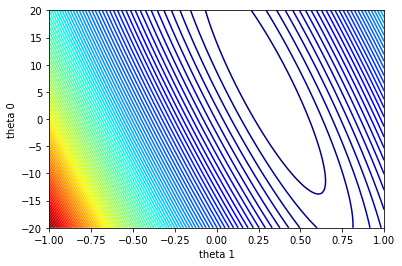

In [ ]:
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap='jet')
plt.xlabel('theta 1')
plt.ylabel('theta 0')

# =============================================== #

# ----- END -----